In [3]:
%matplotlib inline

Machine Learning 
====
## High Interest Credit Card of Technical Debt.

<p>
<center><img height="400" width="400" src="./ML-TechDebt/Visa2.png"/>
<font size=2px> (D. Sculley et al)</font>
</center>

</p>

## Software Engineering, dealing with Technical Debt.
<style>
table,td,tr,th {border:none!important}
</style>
<table border="0">
<tr>
<td align="center" valign="center">
<img height="342" width="342" src="./ML-TechDebt/techDebtQuadrant.png"/>
<a href="http://martinfowler.com/bliki/TechnicalDebtQuadrant.html"><font size=2px>TechnicalDebtQuadrant, Martin Fowler</font></a> 
</td>
<td align="center" valign="center">
  <img height="242" width="242" src="./ML-TechDebt/18-KatrinaOwen_TherapeuticRefactoring.jpg"/>
<a href="http://puppetlabs.com/top-20-flowcon-slides-continuous-delivery"><font size =2px>Therapeutic, Katrina Owen</font></a> 
</td>
</tr>
</table>



+ Strong abstraction boundaries help create maintainable code in which it is easy to make **isolated changes**.
+ Machine Learning packages have all the basic code complexity issues as normal code. <br> **But at a system-level, a machine learning model may subtly** <font color='red'>***erod abstraction boundaries***</font>.


### Entanglement
#### <font color='red'>C</font>hanging <font color='red'>A</font>nything <font color='red'>C</font>hanges <font color='red'>E</font>verything

<style>
table,td,tr,th {border:none!important}
</style>
<table border="0">
<tr>
<td align="center" valign="center">
<img height="542" width="542" src="./ML-TechDebt/titanic.jpg"/>
<font size=2px> Postcard showing the Titanic sinking, Rex Features</font>
</tr>
</table>

In [4]:
import sklearn as sk
from sklearn import linear_model
from sklearn import preprocessing
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
data = pd.read_csv("./ML-TechDebt/train.csv")

In [5]:
X = data[["Pclass","Sex","Age","Fare","Cabin","Embarked","Ticket"]]
Y = data[['Survived']]
def binarization(x_):
  x = np.asarray(x_)
  binarizer = preprocessing.LabelBinarizer()
  bin_ = binarizer.fit(x)
  bin_x = binarizer.transform(x)
  return bin_x

def oneHot(x_):
  x = np.asarray(x_).reshape((x_.shape[0],1))
  enc = preprocessing.OneHotEncoder()
  enc.fit(x)
  enc_x = enc.transform(x).toarray()
  return enc_x

In [6]:
clas = oneHot(X.Pclass)[:,:-1]

sex = oneHot(binarization(X['Sex']))[:,:-1]
#print X.Embarked.fillna('N').unique()

embarked = binarization(X.Embarked.fillna('N'))[:,:-1]
age_cat = np.zeros((X.shape[0]))
age_cat[:]=5
age_cat[np.asarray(X.Age)<4] = 0
age_cat[(np.asarray(X.Age)>=4) & (np.asarray(X.Age)<10)] = 1
age_cat[(np.asarray(X.Age)>=10) & (np.asarray(X.Age)<18)] = 2
age_cat[(np.asarray(X.Age)>=18) & (np.asarray(X.Age)<45)] = 3
age_cat[np.asarray(X.Age)>=45] = 4
age = oneHot(age_cat)[:,0:-1]

per85 = np.percentile(X.Fare,85)
per55 = np.percentile(X.Fare,55)
per25 = np.percentile(X.Fare,25)
per15 = np.percentile(X.Fare,15)

fare_cat = np.zeros((X.shape[0]))
fare_cat[np.asarray(X.Fare.isnull())] = 4
fare_cat[np.asarray(X.Fare)<per15] = 0
fare_cat[(np.asarray(X.Fare)>=per15) & (np.asarray(X.Fare)<per25)] = 1
fare_cat[(np.asarray(X.Fare)>=per25) & (np.asarray(X.Fare)<per55)] = 2
fare_cat[(np.asarray(X.Fare)>=per55) & (np.asarray(X.Fare)<per85)] = 3
fare = oneHot(fare_cat)[:,0:-1]


def train_test(data,Y,count=700,ind = None):
  tot_ac_ind = ind if ind is not None else np.random.permutation(data.shape[0])
  total_ac = data[tot_ac_ind,:]
  train_ac = total_ac[:count,:]
  test_ac = total_ac[count:,:]

  Y_ac = np.ravel(Y)[tot_ac_ind]
  Y_train_ac = Y_ac[:count]
  Y_test_ac = Y_ac[count:]
  
  return((train_ac,Y_train_ac),(test_ac,Y_test_ac)),tot_ac_ind
  

((train_ac,Y_train_ac),(test_ac,Y_test_ac)),ac_ind = train_test(np.concatenate((clas,embarked),axis =1),
                                                                np.ravel(Y),count = 400)
model_ac = linear_model.LogisticRegression()
model_ac.fit(train_ac,Y_train_ac)
print model_ac.score(test_ac,Y_test_ac)

((train_acs,Y_train_acs),(test_acs,Y_test_acs)),acs_ind = train_test(np.concatenate((clas,embarked,sex),axis =1),
                                                                     np.ravel(Y),count = 400,ind =ac_ind)
model_acs = linear_model.LogisticRegression()
model_acs.fit(train_acs,Y_train_acs)
print model_acs.score(test_acs,Y_test_acs)

0.670061099796
0.775967413442


+ Our running example will be **Titanic** dataset available on Kaggle website.<br>
  The objective of the (practice) competition is to predict survivers.
+ We will extend this task by asking other similar questions. The objective for us is to demonstrate some of the practices in building ML models.
  
  <table border="0">
<tr>
<td align="center" valign="center">
<img height="542" width="542" src="./ML-TechDebt/Model_1.png"/>
<font size=2px> A typical Machine Learning Project!</font>
</tr>
</table>

In [7]:
data[:1]

PassengerId  Survived  Pclass                     Name   Sex  Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male   22      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S

In [8]:
from IPython.display import display

In [9]:
import matplotlib.pyplot
import IPython.display
from IPython import get_ipython
def center_figure(fig):
  ip = get_ipython()
  png_rep = ip.display_formatter.formatters["image/png"](fig)
  matplotlib.pyplot.close(fig)
  return IPython.core.display.HTML('<center><img src="data:Image/png;base64,{0}"></center>'.format(png_rep.encode('base64')))

### Who Survives?

In [10]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(np.arange(model_ac.coef_.shape[1]),model_ac.coef_[0,:]/linalg.norm(model_ac.coef_[0,:]),
        color = 'b',alpha =0.4,label = 'C/E model Acc: %f2' % model_ac.score(test_ac,Y_test_ac) )
plt.bar(np.arange(model_acs.coef_.shape[1]),model_acs.coef_[0,:]/linalg.norm(model_acs.coef_[0,:]),
        color = 'r',alpha =0.4,label = 'C/E/S model Acc: %f2' % model_acs.score(test_acs,Y_test_acs))
plt.title("model coefficients")
plt.ylim((-1,1))
plt.legend(loc=3)
plt.subplot(1,2,2)
res = model_ac.predict(test_ac)
plt.hist(res,color = 'b',alpha =0.4,bins = 2)
res = model_acs.predict(test_acs)
n,bins,pat =plt.hist(res,color = 'r',alpha =0.4,bins = 2)
plt.xticks(bins[:-1]+0.25,["Not Survived","Survived"])
center_figure(fig)

### Undeclared Data Dependency
#### Predict age of the passengers

  <table border="0">
<tr>
<td align="center" valign="center">
<img height="542" width="542" src="./ML-TechDebt/Model_2.png"/>
<font size=2px> Undeclared customer of a Machine Learning Project!</font>
</tr>
</table>

### Undeclared Data Dependency
#### Predict age of passengers

+ Our next question is to predict the age of passengers. A simplified version of this question is to classify passengers older than 30 and younger.
+ Here we use the prediction of the previous step. One may assume knowing if someone has survived or not can help determing the age of the person.
+ We will be using two kinds of signals. We use the output of the model based on *Passenger Class* and *Port of Embarkment* to train our classifier.
+ At the next step we use the output of **modified** model based on Passenger Class and Port of Embarkment and *Sex* to make our predictions.
+ Since the underlying mechanism has changed our result will be worse. Retraining the model using modified model will improve the result. We can also observe the change in coeficients as a consequence of change in underlying input data. 

In [40]:
p = np.zeros((data.shape[0],1))
p[:,0] = data['Age']>30
#p = binarization(data['Embarked'].fillna('U'))[:,:-1]

dat = np.concatenate((model_ac.predict(test_ac).reshape(test_ac.shape[0],1),fare[ac_ind[400:],:]),axis =1)
((train_2_acf,Y_train_2_acf),(test_2_acf,Y_test_2_acf)),ac_2_ind = train_test(dat,np.ravel(p[ac_ind[400:],:])
                                                              ,count=450)

dat = np.concatenate((model_acs.predict(test_acs).reshape(test_acs.shape[0],1),fare[ac_ind[400:],:]),axis =1)
((train_2_acsf,Y_train_2_acsf),(test_2_acsf,Y_test_2_acsf)),_ = train_test(dat,np.ravel(p[ac_ind[400:],:])
                                                              ,count=450,ind=ac_2_ind)

model_2_acf = linear_model.LogisticRegression()
model_2_acf.fit(train_2_acf,Y_train_2_acf)

model_2_acsf = linear_model.LogisticRegression()
model_2_acsf.fit(train_2_acsf,Y_train_2_acsf)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

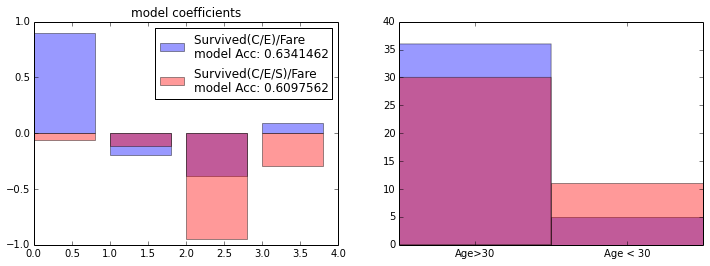

In [41]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(np.arange(model_2_acf.coef_.shape[1]),model_2_acf.coef_[0,:]/linalg.norm(model_2_acf.coef_[0,:]),
        color = 'b',alpha =0.4,label = 'Survived(C/E)/Fare \nmodel Acc: %f2' % model_2_acf.score(test_2_acf,Y_test_2_acf))
plt.bar(np.arange(model_2_acsf.coef_.shape[1]),model_2_acsf.coef_[0,:]/linalg.norm(model_2_acsf.coef_[0,:])
        ,color = 'r',alpha =0.4,label = 'Survived(C/E/S)/Fare \nmodel Acc: %f2' % model_2_acsf.score(test_2_acsf,Y_test_2_acf))
plt.ylim(-1,1)
plt.legend()
plt.title("model coefficients")
plt.subplot(1,2,2)
res = model_2_acf.predict(test_2_acf)
plt.hist(res,color = 'b',alpha =0.4, bins =2)
res = model_2_acf.predict(test_2_acsf)
n,bins,pat = plt.hist(res,color = 'r',alpha =0.4,bins = 2)
plt.xticks(bins[:-1]+0.25,["Age>30","Age < 30"])

from ipy_table import *
results = [
    ['Model', 'Training data','Test data', 'Acc'],
    ['Survived(C/E)/Fare ', 'Survived(C/E)/Fare','Survived(C/E)/Fare', model_2_acf.score(test_2_acf,Y_test_2_acf)], 
    ['Survived(C/E)/Fare ', 'Survived(C/E)/Fare','Survived(C/E/S)/Fare', model_2_acf.score(test_2_acsf,Y_test_2_acsf)],
    ['Survived(C/E/S)/Fare ', 'Survived(C/E/S)/Fare','Survived(C/E/S)/Fare', model_2_acsf.score(test_2_acsf,Y_test_2_acsf)]];


#display(make_table(results))
#display()


In [42]:
pd.DataFrame(results[1:],columns=results[0])

Model         Training data             Test data       Acc
0    Survived(C/E)/Fare     Survived(C/E)/Fare    Survived(C/E)/Fare  0.634146
1    Survived(C/E)/Fare     Survived(C/E)/Fare  Survived(C/E/S)/Fare  0.439024
2  Survived(C/E/S)/Fare   Survived(C/E/S)/Fare  Survived(C/E/S)/Fare  0.609756

### Correction Cascades
#### Can we further improve our result for first question?


  <table border="0">
<tr>
<td align="center" valign="center">
<img height="542" width="542" src="./ML-TechDebt/Model_3.png"/>
<font size=2px> Correction Cascades!</font>
</tr>
</table>

In [ ]:
p = np.zeros((data.shape[0],1))
p = binarization(data[['Survived']])
#p = binarization(data['Embarked'].fillna('U'))

dat = np.concatenate((model_ac.predict(test_ac).reshape(test_ac.shape[0],1),embarked[ac_ind[400:],:]),axis =1)
((train_2_acf,Y_train_2_acf),(test_2_acf,Y_test_2_acf)),ac_2_ind = train_test(dat,np.ravel(p[ac_ind[400:],:])
                                                              ,count=400)

dat = np.concatenate((model_acs.predict(test_acs).reshape(test_acs.shape[0],1),embarked[ac_ind[400:],:]),axis =1)
((train_2_acsf,Y_train_2_acsf),(test_2_acsf,Y_test_2_acsf)),_ = train_test(dat,np.ravel(p[ac_ind[400:],:])
                                                              ,count=400,ind=ac_2_ind)

model_2_acf = linear_model.LogisticRegression()
model_2_acf.fit(train_2_acf,Y_train_2_acf)

model_2_acsf = linear_model.LogisticRegression()
model_2_acsf.fit(train_2_acsf,Y_train_2_acsf)

Model         Training data             Test data       Acc
0         Survived(C/E)          Survived(C/E)         Survived(C/E)  0.670061
1    Survived(C/E)/Fare     Survived(C/E)/Fare    Survived(C/E)/Fare  0.725275
2  Survived(C/E/S)/Fare   Survived(C/E/S)/Fare  Survived(C/E/S)/Fare  0.758242
3       Survived(C/E/S)        Survived(C/E/S)       Survived(C/E/S)  0.775967

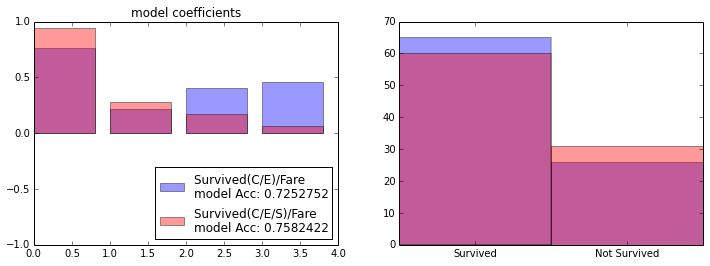

In [117]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(np.arange(model_2_acf.coef_.shape[1]),model_2_acf.coef_[0,:]/linalg.norm(model_2_acf.coef_[0,:]),
        color = 'b',alpha =0.4,label = 'Survived(C/E)/Fare \nmodel Acc: %f2' % model_2_acf.score(test_2_acf,Y_test_2_acf))
plt.bar(np.arange(model_2_acsf.coef_.shape[1]),model_2_acsf.coef_[0,:]/linalg.norm(model_2_acsf.coef_[0,:])
        ,color = 'r',alpha =0.4,label = 'Survived(C/E/S)/Fare \nmodel Acc: %f2' % model_2_acsf.score(test_2_acsf,Y_test_2_acf))
plt.ylim(-1,1)
plt.legend(loc = 4)
plt.title("model coefficients")
plt.subplot(1,2,2)
res = model_2_acf.predict(test_2_acf)
plt.hist(res,color = 'b',alpha =0.4, bins =2)
res = model_2_acf.predict(test_2_acsf)
n,bins,pat = plt.hist(res,color = 'r',alpha =0.4,bins = 2)
plt.xticks(bins[:-1]+0.25,["Survived","Not Survived"])

from ipy_table import *
results = [
    ['Model', 'Training data','Test data', 'Acc'],
    ['Survived(C/E) ', 'Survived(C/E)','Survived(C/E)', model_ac.score(test_ac,Y_test_ac)],     
    ['Survived(C/E)/Fare ', 'Survived(C/E)/Fare','Survived(C/E)/Fare', model_2_acf.score(test_2_acf,Y_test_2_acf)], 
    ['Survived(C/E/S)/Fare ', 'Survived(C/E/S)/Fare','Survived(C/E/S)/Fare', model_2_acsf.score(test_2_acsf,Y_test_2_acsf)],
    ['Survived(C/E/S) ', 'Survived(C/E/S)','Survived(C/E/S)', model_acs.score(test_acs,Y_test_acs)]];


#display(make_table(results))
#display()

pd.DataFrame(results[1:],columns=results[0])

##Questions

+ Is there a **methological** approach to define correct abstractions, analogous to abstractions defined in *Software Engineering* discpline, for Machine Learning systems?

+ Naturally these abstractions will be different from traditional methods by being dependent on **data**.

+ Abstractions should lead **independent components** that could be developed and maintained by separate teams with minimum interactions(Isolated changes).

+ Such abstractions should prevent teams from **artificial improvements** in their systems?

+ What are the minimum requirements(In terms of *data*, *communication* and *interaction* between teams) for such methodology?

+ To what extend can we <font color=red>avoid</font> **extreme cohesion** among independent components?
